# Movie Review Sentiment Analysis

* Use bing liu's dictionary



In [0]:
import csv
import sys
import os
import glob
import pandas as pd
import nltk
import matplotlib.pylab as plt
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
def isNotNull(value):
    return value is not None and len(value)>0

In [0]:
neg_file = []
os.chdir('C:\\Users\\sue\\Desktop\\Text-Sentiment-Analysis--master\\neg')
for file in glob.glob('*.txt'):
    neg_file.append(file)
neg_content = []
for i in range(len(neg_file)):
    txt = open(neg_file[i])
    neg_content.append(txt.read())

In [0]:
pos_file = []
os.chdir('C:\Users\sue\Desktop\Text-Sentiment-Analysis--master\pos')
for file in glob.glob('*.txt'):
    pos_file.append(file)
pos_content = []
for i in range(len(pos_file)):
    txt = open(pos_file[i])
    pos_content.append(txt.read())

In [0]:
Bing_senti = pd.DataFrame()
Bing_senti['pos'] = pos_content
Bing_senti['neg'] = neg_content
Bing_senti.head() 
Bing_senti.head()

,pos,neg
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,..."
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs..."
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...


In [0]:
Bing_senti['quote_detected_pos']='default value'

Bing_senti['quote_detected_neg']='default value'

In [0]:
Bing_senti.head()

,pos,neg,quote_detected_pos,quote_detected_neg
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,...",default value,default value
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...,default value,default value
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...,default value,default value
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs...",default value,default value
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...,default value,default value


In [0]:
import re

In [0]:
def quote_detect_pos(Bing_senti): 
    
    for i in range (0,len(Bing_senti)):
        list_row=[m.start() for m in re.finditer("\"", Bing_senti.pos.iloc[i])]
        quote_pos=str()
        for k in range(0,len(list_row)-1,2):
            quote_k=Bing_senti.pos.iloc[i][list_row[k] +1: list_row[k+1] ]
            quote_pos=quote_pos+quote_k
            
        Bing_senti.quote_detected_pos.iloc[i]=quote_pos



In [0]:
def quote_detect_neg(Bing_senti): 
    
    for i in range (0,len(Bing_senti)):
        list_row=[m.start() for m in re.finditer("\"", Bing_senti.neg.iloc[i])]
        quote_neg=str()
        for k in range(0,len(list_row)-1,2):
            quote_k=Bing_senti.neg.iloc[i][list_row[k] +1: list_row[k+1] ]
            quote_neg=quote_neg+quote_k

        Bing_senti.quote_detected_neg.iloc[i]=quote_neg

In [0]:
quote_detect_neg(Bing_senti)

In [0]:
Bing_senti.head()

,pos,neg,quote_detected_pos,quote_detected_neg
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,...","graphic novel , unfortunates who holds back...",sorta normal fantasy into it the suits
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...,m,"hey , let's chase these people around with so..."
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...,,
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs...","jaws jaws jaws it's a perfect engine , an ...","quest for camelot anastasia , hercules , q..."
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...,"spawn rumble in the bronx jackie , save us ...",this is the story of daryl gleason stalked


## Load BIng Liu's Dictionary

In [0]:
os.chdir('C:\Users\sue\Desktop\Text-Sentiment-Analysis--master/')
dict_pos = []
dict_neg = []
f = open('negative-words.txt','r')
for line in f:
    t= line.strip().lower();
    if (isNotNull(t)):
        dict_neg.append(t)
f.close()

f = open('positive-words.txt','r')
for line in f:
    t = line.strip().lower();
    if (isNotNull(t)):
        dict_pos.append(t)
f.close()

In [0]:
analysis_for_pos = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(Bing_senti.quote_detected_pos[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_pos.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_quote_pos'] = analysis_for_pos

In [0]:
analysis_for_neg = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(Bing_senti.quote_detected_neg[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_neg.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_quote_neg'] = analysis_for_neg

In [0]:
analysis_for_original_quote_pos = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(Bing_senti.pos[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_original_quote_pos.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_original_pos'] = analysis_for_original_quote_pos

In [0]:
analysis_for_original_quote_neg = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(Bing_senti.neg[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_original_quote_neg.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_original_neg'] = analysis_for_original_quote_neg

In [0]:
Bing_senti.head(20)

,pos,neg,quote_detected_pos,quote_detected_neg,Bing_analysis_for_quote_pos,Bing_analysis_for_quote_neg,Bing_analysis_for_original_pos,Bing_analysis_for_original_neg
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,...","graphic novel , unfortunates who holds back...",sorta normal fantasy into it the suits,0,0,-17,-3
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...,m,"hey , let's chase these people around with so...",0,0,-1,2
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...,,,0,0,13,-3
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs...","jaws jaws jaws it's a perfect engine , an ...","quest for camelot anastasia , hercules , q...",1,0,-5,-4
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...,"spawn rumble in the bronx jackie , save us ...",this is the story of daryl gleason stalked,-1,0,-6,-10
5,"on june 30 , 1960 , a self-taught , idealistic...",capsule : in 2176 on the planet mars police ta...,"lumumba . lumumba - death of a prophet , lu...",napolean desolation,-1,-1,14,-10
6,"apparently , director tony kaye had a major ba...","so ask yourself what "" 8mm "" ( "" eight millime...",,8mm eight millimeter documentaries 8mm ba...,0,0,4,-12
7,one of my colleagues was surprised when i told...,that's exactly how long the movie felt to me ....,money versus values .,"a big pussy , arnie the dinosaur now it's t...",0,0,15,-13
8,"after bloody clashes and independence won , lu...",call it a road trip for the walking wounded . ...,lumumba,all of life's riddles are answered in the mov...,0,0,-8,-22
9,the american action film has been slowly drown...,plot : a young french boy sees his parents kil...,,bad guy american roles nice guy real epic ...,0,2,3,-11


Text(0.5,1,'Sentiment Analysis for Positive Quote Distribution')

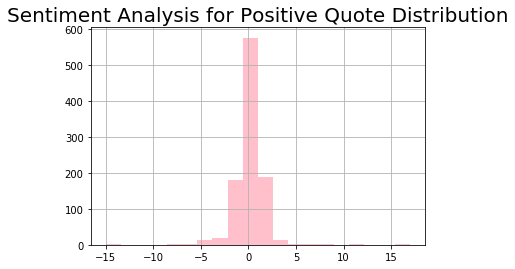

In [0]:
Bing_senti.Bing_analysis_for_quote_pos.hist(bins = 20,color = 'pink')
plt.title('Sentiment Analysis for Positive Quote Distribution',fontsize = 20)

Text(0.5,1,'Sentiment Analysis for Negative Quote Distribution')

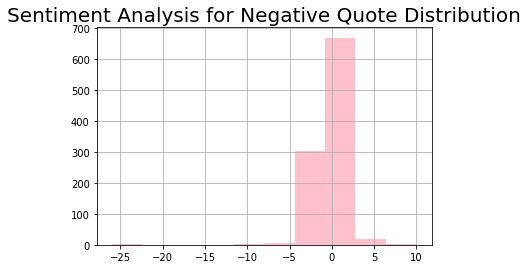

In [0]:
Bing_senti.Bing_analysis_for_quote_neg.hist(color = 'pink')
plt.title('Sentiment Analysis for Negative Quote Distribution',fontsize = 20)

Text(0.5,1,'Sentiment Analysis for Positive Post Distribution')

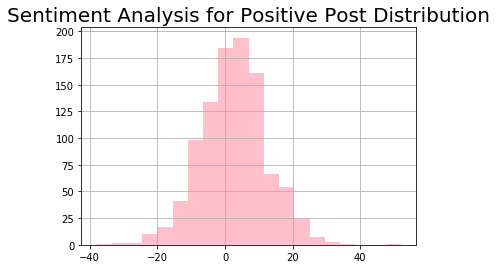

In [0]:
Bing_senti.Bing_analysis_for_original_pos.hist(bins = 20,color = 'pink')
plt.title('Sentiment Analysis for Positive Post Distribution',fontsize = 20)

Text(0.5,1,'Sentiment Analysis for Negative Post Distribution')

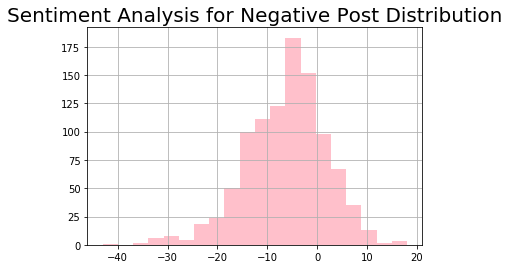

In [0]:
Bing_senti.Bing_analysis_for_original_neg.hist(bins = 20,color = 'pink')
plt.title('Sentiment Analysis for Negative Post Distribution',fontsize = 20)

In [0]:
neg_analysis_label = []
for i in range(0,len(Bing_senti)):
    if Bing_senti.Bing_analysis_for_original_neg[i] >0:
        neg_analysis_label.append(1)
    else:
        neg_analysis_label.append(0)
        
pos_analysis_label = []
for i in range(0,len(Bing_senti)):
    if Bing_senti.Bing_analysis_for_original_pos[i] >0:
        pos_analysis_label.append(1)
    else:
        pos_analysis_label.append(0)
        
pos_analysis_of_quote_label = []
for i in range(0,len(Bing_senti)):
    if Bing_senti.Bing_analysis_for_quote_pos[i] >0:
        pos_analysis_of_quote_label.append(1)
    else:
        pos_analysis_of_quote_label.append(0)
        
neg_analysis_of_quote_label = []
for i in range(0,len(Bing_senti)):
    if Bing_senti.Bing_analysis_for_quote_neg[i] >0:
        neg_analysis_of_quote_label.append(1)
    else:
        neg_analysis_of_quote_label.append(0)

In [0]:
Bing_senti['analysis_label_for_neg'] = neg_analysis_label
Bing_senti['analysis_label_for_pos'] = pos_analysis_label
Bing_senti['analysis_label_for_quote_neg'] = neg_analysis_of_quote_label
Bing_senti['analysis_label_for_quote_pos'] = pos_analysis_of_quote_label

In [0]:
Bing_senti['quote_substracted_pos']='default value'
Bing_senti['quote_substracted_neg']='default value'
for i in range(0,len(Bing_senti)):
    Bing_senti['quote_substracted_pos'].iloc[i]=Bing_senti.Bing_analysis_for_original_pos.iloc[i]-Bing_senti.analysis_label_for_quote_pos.iloc[i]
    Bing_senti['quote_substracted_neg'].iloc[i]=Bing_senti.Bing_analysis_for_original_neg.iloc[i]-Bing_senti.analysis_label_for_quote_neg.iloc[i]

In [0]:
pos_quote_substracted_label = []
for i in range(0,len(Bing_senti)):
    if Bing_senti.quote_substracted_pos[i] >0:
        pos_quote_substracted_label.append(1)
    else:
        pos_quote_substracted_label.append(0)
neg_quote_substracted_label = []
for i in range(0,len(Bing_senti)):
    if Bing_senti.quote_substracted_neg[i] >0:
        neg_quote_substracted_label.append(1)
    else:
        neg_quote_substracted_label.append(0)
Bing_senti['pos_quote_substracted_label'] = pos_quote_substracted_label
Bing_senti['neg_quote_substracted_label'] = neg_quote_substracted_label

In [0]:
Bing_senti[['Bing_analysis_for_quote_pos','Bing_analysis_for_original_pos','Bing_analysis_for_quote_neg','Bing_analysis_for_original_neg']]

,Bing_analysis_for_quote_pos,Bing_analysis_for_original_pos,Bing_analysis_for_quote_neg,Bing_analysis_for_original_neg
0,0,-17,0,-3
1,0,-1,0,2
2,0,13,0,-3
3,1,-5,0,-4
4,-1,-6,0,-10
5,-1,14,-1,-10
6,0,4,0,-12
7,0,15,0,-13
8,0,-8,0,-22
9,0,3,2,-11


In [0]:
Bing_senti['label_for_neg'] = [0]*len(Bing_senti)
Bing_senti['label_for_pos'] = [1]*len(Bing_senti)
Bing_senti.head(60)

,pos,neg,quote_detected_pos,quote_detected_neg,Bing_analysis_for_quote_pos,Bing_analysis_for_quote_neg,Bing_analysis_for_original_pos,Bing_analysis_for_original_neg,analysis_label_for_neg,analysis_label_for_pos,...,analysis_label_for_quote_pos,quote_substracted_pos,quote_substracted_neg,label_for_neg,label_for_pos,pos_quote_substracted_label,neg_quote_substracted_label,length_of_quote_pos,share_of_quote_pos,share_of_quote_neg
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,...","graphic novel , unfortunates who holds back...",sorta normal fantasy into it the suits,0,0,-17,-3,0,0,...,0,-17,-3,0,1,0,0,99,0,0
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...,m,"hey , let's chase these people around with so...",0,0,-1,2,1,0,...,0,-1,2,0,1,0,1,3,0,0
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...,,,0,0,13,-3,0,1,...,0,13,-3,0,1,1,0,0,0,0
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs...","jaws jaws jaws it's a perfect engine , an ...","quest for camelot anastasia , hercules , q...",1,0,-5,-4,0,0,...,1,-6,-4,0,1,0,0,231,0,0
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...,"spawn rumble in the bronx jackie , save us ...",this is the story of daryl gleason stalked,-1,0,-6,-10,0,0,...,0,-6,-10,0,1,0,0,73,0,0
5,"on june 30 , 1960 , a self-taught , idealistic...",capsule : in 2176 on the planet mars police ta...,"lumumba . lumumba - death of a prophet , lu...",napolean desolation,-1,-1,14,-10,0,1,...,0,14,-10,0,1,1,0,61,0,0
6,"apparently , director tony kaye had a major ba...","so ask yourself what "" 8mm "" ( "" eight millime...",,8mm eight millimeter documentaries 8mm ba...,0,0,4,-12,0,1,...,0,4,-12,0,1,1,0,0,0,0
7,one of my colleagues was surprised when i told...,that's exactly how long the movie felt to me ....,money versus values .,"a big pussy , arnie the dinosaur now it's t...",0,0,15,-13,0,1,...,0,15,-13,0,1,1,0,23,0,0
8,"after bloody clashes and independence won , lu...",call it a road trip for the walking wounded . ...,lumumba,all of life's riddles are answered in the mov...,0,0,-8,-22,0,0,...,0,-8,-22,0,1,0,0,9,0,0
9,the american action film has been slowly drown...,plot : a young french boy sees his parents kil...,,bad guy american roles nice guy real epic ...,0,2,3,-11,0,1,...,0,3,-12,0,1,1,0,0,0,0


In [0]:
Bing_senti.to_csv('Bing_senti.csv', sep=',', header=True, index=True)

In [0]:
Bing_senti['share_of_quote_pos']='default value'
for i in range(0,len(Bing_senti)):
    Bing_senti['share_of_quote_pos'].iloc[i]=len(Bing_senti.quote_detected_pos.iloc[i])/len(Bing_senti.pos.iloc[i])

In [0]:
Bing_senti['share_of_quote_neg']='default value'
for i in range(0,len(Bing_senti)):
    Bing_senti['share_of_quote_neg'].iloc[i]=len(Bing_senti.quote_detected_neg.iloc[i])/len(Bing_senti.neg.iloc[i])

In [0]:
Bing_analysis = Bing_senti.neg_quote_substracted_label.tolist() + Bing_senti.pos_quote_substracted_label.tolist()

In [0]:
True_label = Bing_senti.label_for_neg.tolist() + Bing_senti.label_for_pos.tolist()

In [0]:
confusion_matrix(True_label,Bing_analysis)

array([[827, 173],
       [412, 588]], dtype=int64)

In [0]:
print classification_report(True_label,Bing_analysis)

             precision    recall  f1-score   support

          0       0.67      0.83      0.74      1000
          1       0.77      0.59      0.67      1000

avg / total       0.72      0.71      0.70      2000



In [0]:
Bing_pos=pd.DataFrame(Bing_senti[['Bing_analysis_for_original_pos','Bing_analysis_for_quote_pos','share_of_quote_pos','label_for_pos']])

In [0]:
Bing_pos.head()

,Bing_analysis_for_original,Bing_analysis_for_quote,share_of_quote,label
0,-17,0,0,1
1,-1,0,0,1
2,13,0,0,1
3,-5,1,0,1
4,-6,-1,0,1


In [0]:
Bing_pos.rename (columns = {'Bing_analysis_for_original_pos': 'Bing_analysis_for_original','Bing_analysis_for_quote_pos':'Bing_analysis_for_quote','share_of_quote_pos':'share_of_quote','label_for_pos':'label'}, inplace = True) 

In [0]:
Bing_neg=pd.DataFrame(Bing_senti[['Bing_analysis_for_original_neg','Bing_analysis_for_quote_neg','share_of_quote_neg','label_for_neg']])

In [0]:
Bing_neg.rename(columns={'Bing_analysis_for_original_neg':'Bing_analysis_for_original','Bing_analysis_for_quote_neg':'Bing_analysis_for_quote','share_of_quote_neg':'share_of_quote','label_for_neg':'label'},inplace=True)

In [0]:
Bing=pd.concat([Bing_pos,Bing_neg], axis=0)

In [0]:
Bing.head(10)

,Bing_analysis_for_original,Bing_analysis_for_quote,share_of_quote,label
0,-17,0,0,1
1,-1,0,0,1
2,13,0,0,1
3,-5,1,0,1
4,-6,-1,0,1
5,14,-1,0,1
6,4,0,0,1
7,15,0,0,1
8,-8,0,0,1
9,3,0,0,1


In [0]:
X=Bing[['Bing_analysis_for_original','Bing_analysis_for_quote','share_of_quote']]
y=Bing['label']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train

array([[0.37777778, 0.68421053],
       [0.34444444, 0.68421053],
       [0.35555556, 0.68421053],
       ...,
       [0.33333333, 0.68421053],
       [0.63333333, 0.71052632],
       [0.51111111, 0.71052632]])

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.69
Accuracy of Logistic regression classifier on test set: 0.71


In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.75
Accuracy of Decision Tree classifier on test set: 0.68
